In [32]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [33]:
IMAGE_SIZE= 128
BATCH_SIZE=16
CHANNELS=3
EPOCHS=50


In [34]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Deep_Learning_Project\Deep_Learning\PlantVillage",
    shuffle=True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
                                                    )

Found 2152 files belonging to 3 classes.


In [35]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [36]:
len(dataset)

135

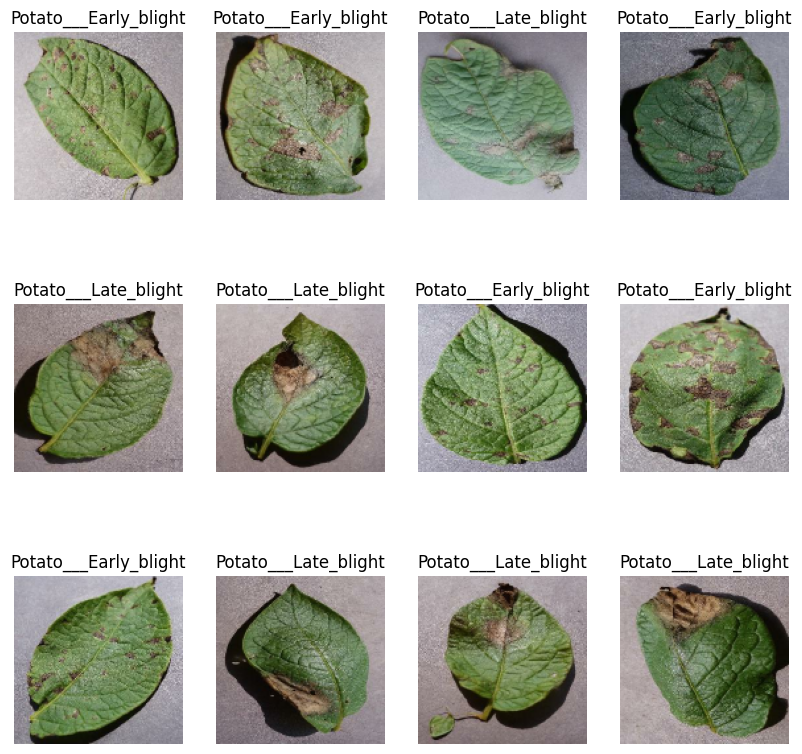

In [37]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]])
     plt.axis("off")
    

In [38]:
len(dataset)

135

80% ==>training
20% ==> 10% validation, 10% test

In [39]:
train_size=0.8
len(dataset)*train_size

108.0

In [40]:
train_ds=dataset.take(108)
len(train_ds)

108

In [41]:
test_ds=dataset.skip(108)
len(test_ds)

27

In [42]:
val_size=0.1
len(dataset)*val_size

13.5

In [43]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [44]:
test_ds = test_ds.skip(14)
len(test_ds)

13

In [45]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle = True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split *ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds , val_ds , test_ds

In [46]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [47]:
len(train_ds)

108

In [48]:
len(val_ds)

13

In [49]:
len(test_ds)

14

In [50]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [51]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [52]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

])

In [53]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes= 3
model = models.Sequential([
     layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32 , kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64 , kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')

    ])


In [54]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

In [56]:
history=model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size=BATCH_SIZE,
    verbose =1,
    validation_data= val_ds
)

Epoch 1/50


108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.7645 - loss: 0.6054 - val_accuracy: 0.9150 - val_loss: 0.4759
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.8542 - loss: 0.3563 - val_accuracy: 0.9200 - val_loss: 0.1712
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.9184 - loss: 0.1982 - val_accuracy: 0.9200 - val_loss: 0.1440
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.9230 - loss: 0.2032 - val_accuracy: 0.9350 - val_loss: 0.1698
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.9288 - loss: 0.1863 - val_accuracy: 0.8700 - val_loss: 0.2837
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.9444 - loss: 0.1443 - val_accuracy: 0.9600 - val_loss: 0.1008
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.9554 - loss: 0.1243 - val_accuracy: 0.9850 - val_loss: 0.0654
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.9543 - loss: 0.1234 - val

In [57]:
scores=model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9911 - loss: 0.0271


In [58]:
scores

[0.027059661224484444, 0.9910714030265808]

In [59]:
history

In [60]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 108}

In [61]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


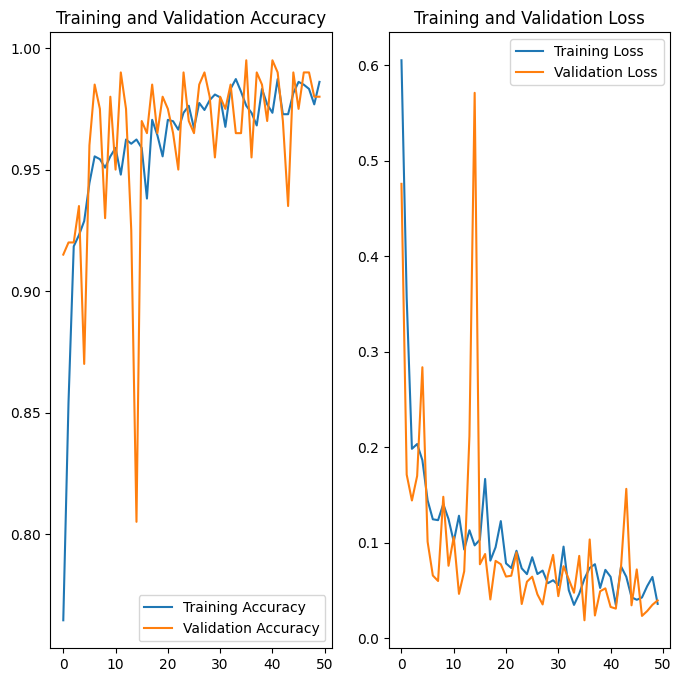

In [70]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label ='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label ='Training Loss')
plt.plot(range(EPOCHS), val_loss, label ='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [83]:
np.argmax([1.8912899e-04, 9.9981087e-01, 4.8779887e-09])

np.int64(1)

First image to predict
 actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted label: Potato___Late_blight


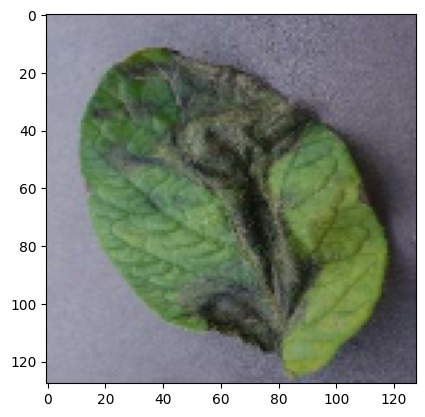

In [88]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):

    first_image= images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print(" actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])




In [89]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #Create a batch
     
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


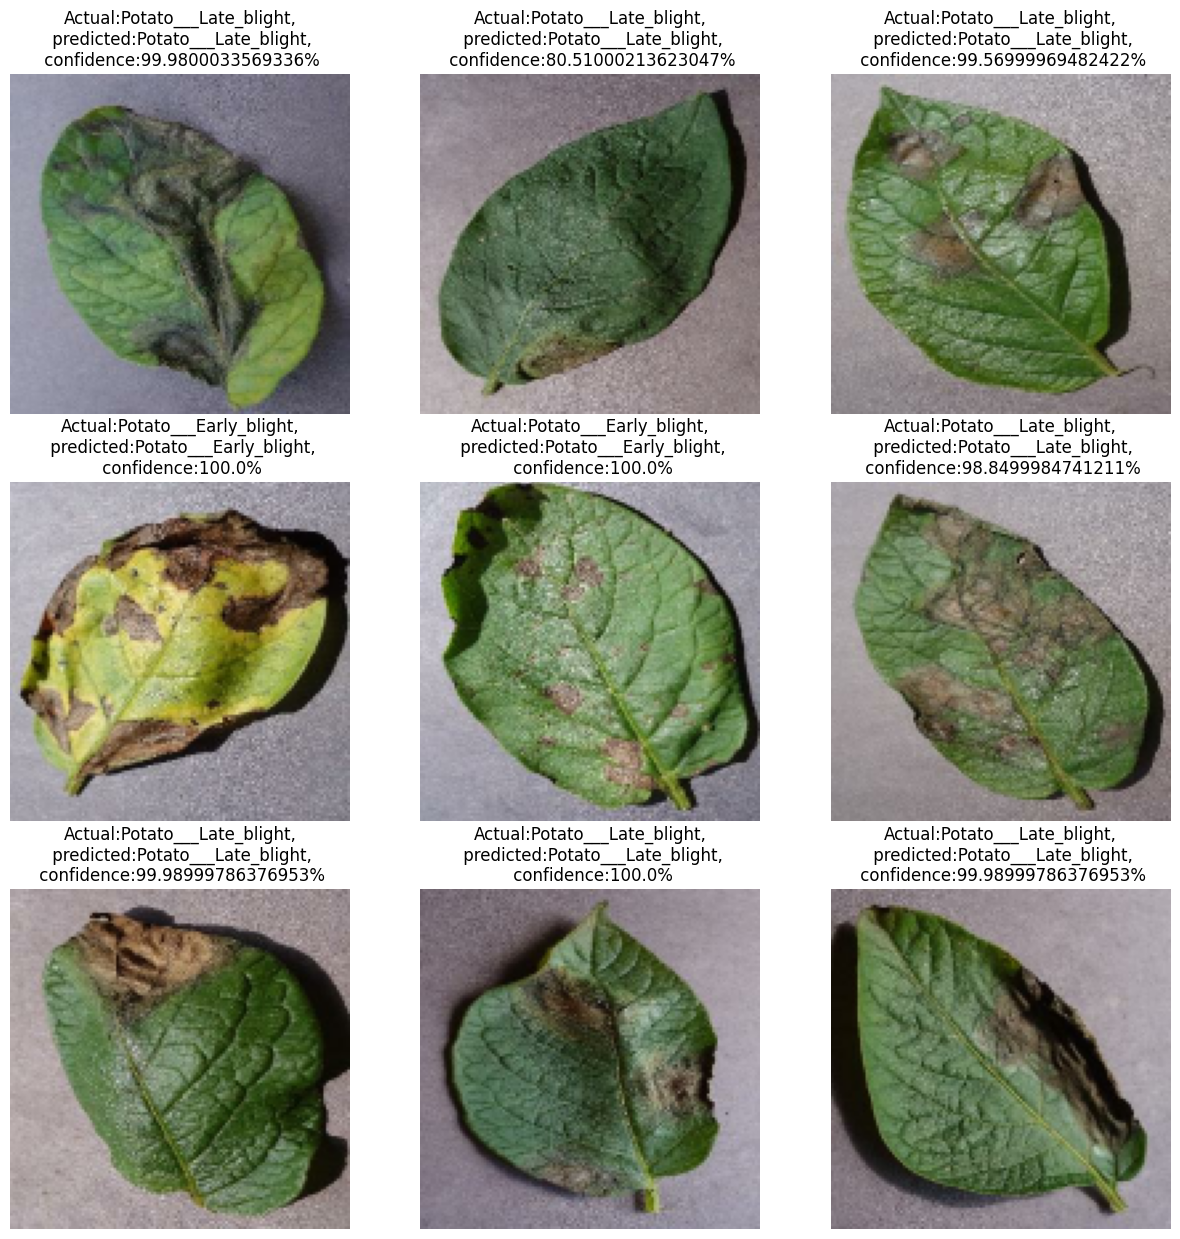

In [96]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in  range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class ,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class},\n confidence:{confidence}%")

        plt.axis("off")



In [113]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.export(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


Saved artifact at '../models/4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2462076829520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076828944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076827984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461356384016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461356381904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076359632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076360016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076356176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076366160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2462076355216: TensorSpec(shape=(), dtype=tf.resource, name=None)
